In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'

# Patient CJ

In [ ]:
cj_ntwrk = np.load('datasets/id002_cj/CJ_network.npz')
cj_sim_data = np.load('datasets/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

#### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
num_nodes = cj_ntwrk['SC'].shape[0]
log_norm = colors.LogNorm(vmin=1e-7, vmax=cj_ntwrk['SC'].max())
plt.imshow(cj_ntwrk['SC'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/SC.png')


#### Gain Matrix

In [ ]:
plt.figure(figsize=(6,10))
num_sensors, num_nodes = cj_ntwrk['gain_mat'].shape
log_norm = colors.LogNorm(vmin=cj_ntwrk['gain_mat'].min(), vmax=cj_ntwrk['gain_mat'].max())
plt.imshow(cj_ntwrk['gain_mat'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.045)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/Gain_matrix.png')

In [ ]:
print(cj_sim_data.keys())
print(cj_sim_data['src_sig'].shape)

#### Simulated Source activity

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
# res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
start_idx = 2500
end_idx = 3800
src_sig = cj_sim_data['src_sig'][start_idx:end_idx,0,:,0] + cj_sim_data['src_sig'][start_idx:end_idx,3,:,0]
n_areas = src_sig.shape[1]

fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = src_sig[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(EZ)')
    elif(i in pz):
        t = src_sig[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(PZ)')
    else:
        plt.plot(src_sig[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels);
# legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
#                    Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
#                    Line2D([0], [0], color='black', alpha=0.5, linewidth=4, label='Non-seizing'),]
# plt.legend(handles=legend_elements)
# plt.savefig(f'{res_root_dir}/figures/CJ/source_activity.png')



#### Simulated SEEG

In [ ]:
random.seed(100)
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 2500
end_idx = 3800
seeg_raw = cj_sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/id002_cj/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = random.sample(range(0,seeg.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 60*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(f'{res_root_dir}/figures/CJ/seeg.png')

#### Sensors

In [13]:
import tvbpipeline.util.plot
import numpy as np
import os
import importlib

/home/anirudh/hdisk/Academia/projects/vep.stan/tvbpipeline/util/elecs.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(fl, dtype=None)


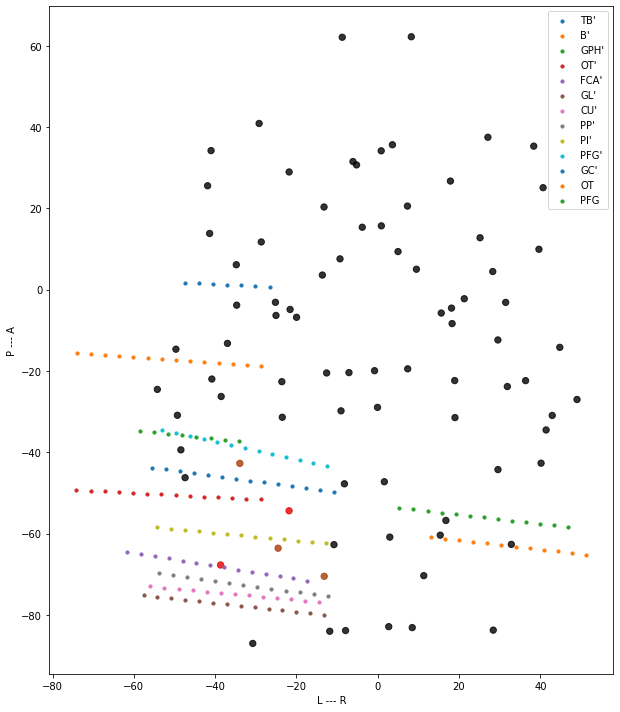

In [16]:
res_root_dir = 'results/tmp'
cj_sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id002_cj/connectivity.zip', 'datasets/syn_data/id002_cj/seeg.xyz', ez, pz, f'{res_root_dir}/figures/electrodes.png')

#### Onsets

In [1]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [2]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
start_idx = 2500
end_idx = 3800
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 10
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
optima = lib.io.stan.read_samples(['results/exp10/exp10.57.20/samples_syn_cj_optim_chain1.csv'])
fit_src_sig = optima['x'][0]

In [3]:
onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > -1
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

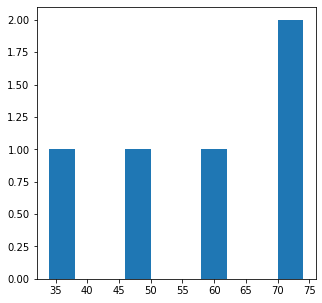

In [4]:
plt.figure(figsize=(5,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist(onsets[np.nonzero(onsets > 0)]);

In [5]:
onsets = np.zeros(fit_src_sig.shape[1])
for i, sig in enumerate(fit_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

(array([2., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 array([30. , 34.1, 38.2, 42.3, 46.4, 50.5, 54.6, 58.7, 62.8, 66.9, 71. ]),
 <a list of 10 Patch objects>)

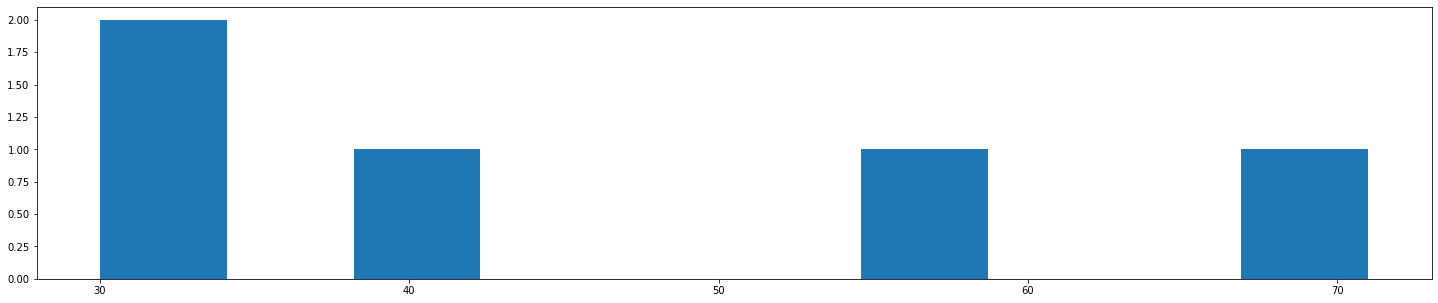

In [12]:
plt.figure(figsize=(25,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
plt.hist(onsets[np.nonzero(onsets > 0)])
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);

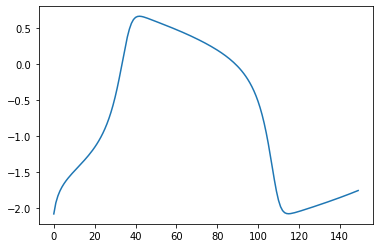

In [11]:
plt.plot(fit_src_sig[:,5])

In [ ]:
plt.figure(figsize=(25,11))
lib.plots.stan.plot_source(fit_src_sig, optima['z'][0], sim_data['ez'], np.concatenate((sim_data['pz_x0'], sim_data['pz_kplng'])))